# Import python packages

In [1]:
import os
SRC_PATH = '../src/'
os.chdir(SRC_PATH)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

SEED = 7
np.random.seed(SEED)

# Define parameters and load dataset

In [3]:
LABELS = 'combined' # choose between 'vf and 'combined'
DATA_TYPE = 'lats_longs' # choose between 'lats_longs' and 'countries'

In [4]:
MODEL_NAME = DATA_TYPE + '_' + LABELS + '_classification_use_cases_analysis'

ipsource_dict = {1: 'M', 2: 'R', 3: 'A', 4: 'X', 0: "pad"}
SOURCES_NUM = len(ipsource_dict) + 1
label_dict = {0: 'G', 1: 'R',2: 'Unknown'}
class_names = ["GREEN", "RED"]

DATA_PATH = '../data/'
MODELS_PATH = '../models/'
RESULTS_PATH = '../results/'

path_prefix = RESULTS_PATH + MODEL_NAME

use_cases = pd.read_pickle("../data/use_cases.pkl")

In [5]:
use_cases

,srcAS,destAS,srcCC,destCC,num_hops,lat,long,IPsource,geoCC,ASN
trid,,,,,,,,,,
0,32780,4657,US,SG,19,"[40.71427, 40.71427, 40.71427, 40.71427, 4.609...","[-74.00596999999999, -74.00596999999999, -74.0...","[1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 1, ...","[US, US, US, US, CO, CO, US, US, US, SG, SG, S...","[32780, 32780, 6461, 6461, 262589, 262589, 645..."
1,42708,30917,SE,HU,14,"[59.33258000000001, 59.33258000000001, 59.5, 5...","[18.0649, 18.0649, 18.0, 10.01534, 10.01534, 8...","[1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 2, 2]","[SE, SE, SE, DE, DE, DE, DE, DE, HU, HU, HU, H...","[42708, 1299, 1299, 1299, 1299, 3320, 3320, 33..."
2,3257,5511,US,FR,7,"[47.606199999999994, 22.28552, 22.28552, 22.28...","[-122.33200000000001, 114.15768999999997, 114....","[1, 1, 1, 1, 2, 1, 1]","[US, HK, HK, HK, FR, FR, FR]","[3257, 3257, 5511, 5511, 5511, 5511, 5511]"
3,46562,8220,US,IE,17,"[34.0522, 34.0522, 34.0522, 34.0522, 29.424120...","[-118.244, -118.244, -118.244, -118.244, -98.4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, ...","[US, US, US, US, US, US, US, US, US, US, US, S...","[46562, 46562, 174, 174, 174, 174, 174, 174, 1..."


In [6]:
max_len = max(len(raw) for raw in use_cases['lat'].values)
max_len = max(max_len, 40)
print(max_len)

40


## Process data

In [7]:
from data_utils import *

use_cases = generate_dataset_and_meta(use_cases, data_type=DATA_TYPE, max_len=max_len)
print(len(use_cases))

Using TensorFlow backend.
C:\Users\tals\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\tals\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\tals\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\tals\AppData\Roaming

4


In [8]:
use_cases

,srcAS,destAS,srcCC,destCC,num_hops,geoCC,ASN,sources,lats_longs
trid,,,,,,,,,
0,32780,4657,US,SG,19,"[US, US, US, US, CO, CO, US, US, US, SG, SG, S...","[32780, 32780, 6461, 6461, 262589, 262589, 645...","[1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 1, ...","[[0.4523807764053345, -0.41114428639411926], [..."
1,42708,30917,SE,HU,14,"[SE, SE, SE, DE, DE, DE, DE, DE, HU, HU, HU, H...","[42708, 1299, 1299, 1299, 1299, 3320, 3320, 33...","[1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 2, 2, 0, ...","[[0.6592509150505066, 0.10036055743694305], [0..."
2,3257,5511,US,FR,7,"[US, HK, HK, HK, FR, FR, FR]","[3257, 3257, 5511, 5511, 5511, 5511, 5511]","[1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.5289577841758728, -0.679622232913971], [0...."
3,46562,8220,US,IE,17,"[US, US, US, US, US, US, US, US, US, US, US, S...","[46562, 46562, 174, 174, 174, 174, 174, 174, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, ...","[[0.37835776805877686, -0.6569111347198486], [..."


In [9]:
import pickle
import os.path

if DATA_TYPE == "countries":
    country_idx = pickle.load(open(DATA_PATH + 'country_idx.pkl', 'rb'))
    total_countries = len(country_idx)
    print(total_countries)
    embedding_vecor_length = 32
else:
    total_countries = None
    country_idx = None
    embedding_vecor_length = 32

In [10]:
if DATA_TYPE == "lats_longs":
    input_shape = np.array(use_cases["lats_longs"].values[0]).shape
else:
    input_shape = np.array(use_cases["countries"].values[0]).shape
print(input_shape)

(40, 2)


## Create np arrays

In [11]:
x_use_cases, u_use_cases = generate_set_arrays(use_cases, max_len, DATA_TYPE, country_idx=country_idx)
print(x_use_cases.shape, u_use_cases.shape)

(4, 40, 2) (4, 40)


In [12]:
print(np.unique(u_use_cases))

[0 1 2 3]


# Load models

In [13]:
from attention_models import generate_model

# def load_model(attention_name):
#     model_name = DATA_TYPE + '_' + LABELS + '_classification_' + attention_name + '_SimpleNet'
#     with open(MODELS_PATH + model_name + '.json', 'r') as f:
#         loaded_model =  model_from_json(f.read())
#     loaded_model.load_weights(MODELS_PATH + model_name + '_acc.hdf5')
#     print("Successfully loaded", attention_name, "model from disk")
#     return loaded_model

def load_model(ATTENTION_NAME):
    if ATTENTION_NAME == "SDPA":
        USE_SOURCES = False
    else:
        USE_SOURCES = True
        
    model = generate_model(input_shape, ATTENTION_NAME, USE_SOURCES, USE_EMBEDDING, num_categories=total_countries,
                       embedding_vecor_length=embedding_vecor_length, attention_first=ATTENTION_FIRST,
                       blstm=BLSTM, no_lstm=NO_LSTM)
    model_name = DATA_TYPE + '_' + LABELS + '_classification_' + ATTENTION_NAME + '_SimpleNet'
    model.load_weights(MODELS_PATH + model_name + '_acc.hdf5')
    print("Successfully loaded", ATTENTION_NAME, "model from disk")
    return model


if DATA_TYPE == "lats_longs":
    USE_EMBEDDING = False
else:
    USE_EMBEDDING = True

ATTENTION_FIRST = True
BLSTM = True
NO_LSTM = False

model_sdpa = load_model('SDPA')
model_sasa = load_model('SASA')
model_sdpa_qs_ks = load_model('SDPA_QS_KS')

Instructions for updating:
Colocations handled automatically by placer.
Successfully loaded SDPA model from disk
Successfully loaded SASA model from disk
Successfully loaded SDPA_QS_KS model from disk


# Use Cases Anaysis

## Run predictions over the set

In [14]:
from model_utils import *
from model_visualization_utils import *
val_batch_size = 1024

y_use_cases_prediction_sdpa, y_use_cases_prob_sdpa = get_model_pred_prob(model_sdpa, x_use_cases, u_use_cases, val_batch_size, False)
print(len(y_use_cases_prediction_sdpa))

y_use_cases_prediction_sasa, y_use_cases_prob_sasa = get_model_pred_prob(model_sasa, x_use_cases, u_use_cases, val_batch_size, True)
print(len(y_use_cases_prediction_sasa))

y_use_cases_prediction_sdpa_qs_ks, y_use_cases_prob_sdpa_qs_ks = get_model_pred_prob(model_sdpa_qs_ks, x_use_cases, u_use_cases, val_batch_size, True)
print(len(y_use_cases_prediction_sdpa_qs_ks))

4/4 [==============================] - 0s 114ms/step
4
4/4 [==============================] - 0s 117ms/step
4
4/4 [==============================] - 0s 101ms/step
4


## Get attnetion and sources

In [15]:
attention_vec_out_sdpa, sources_out_sdpa = get_attention_sources_vecs(x_use_cases, u_use_cases, model_sdpa,
                                                                use_sources=False, attention_name='SDPA')

attention_vec_out_sasa, sources_out_sasa = get_attention_sources_vecs(x_use_cases, u_use_cases, model_sasa,
                                                                use_sources=True, attention_name='SASA')

attention_vec_out_sdpa_qs_ks, sources_out_sdpa_qs_ks = get_attention_sources_vecs(x_use_cases, u_use_cases, model_sdpa_qs_ks,
                                                                use_sources=True, attention_name='SDPA_QS_KS')

print(attention_vec_out_sdpa.shape)
print(attention_vec_out_sasa.shape, sources_out_sasa.shape)
print(attention_vec_out_sdpa_qs_ks.shape, sources_out_sdpa_qs_ks.shape)

(4, 40, 40)
(4, 40, 40) (4, 40, 32)
(4, 40, 40) (4, 40, 32)


## Visualize Attention

0
SDPA [0.9729191]


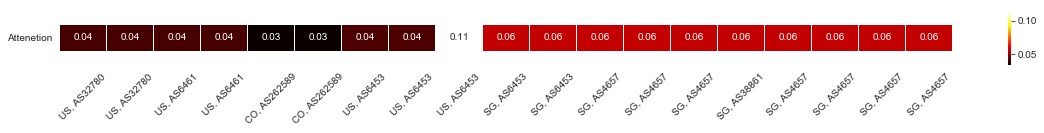

SASA [0.7499372]


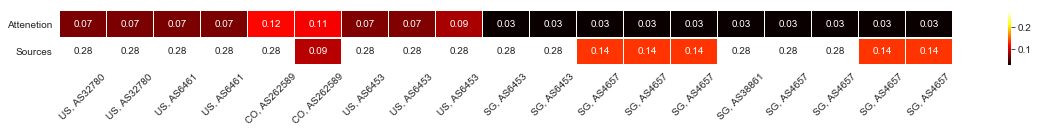

SDPA_QS_KS [0.81392133]


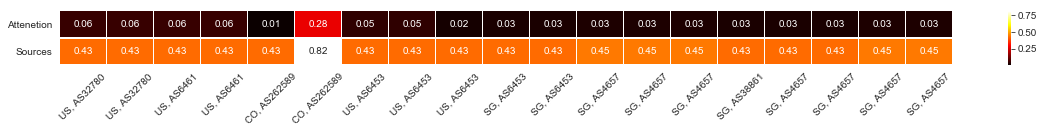

1
SDPA [0.987117]


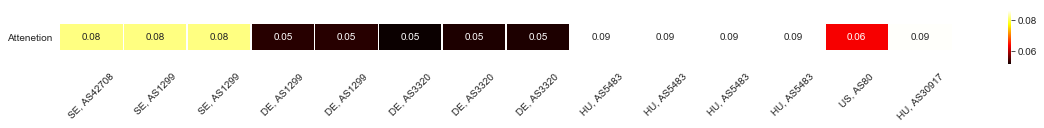

SASA [0.99965346]


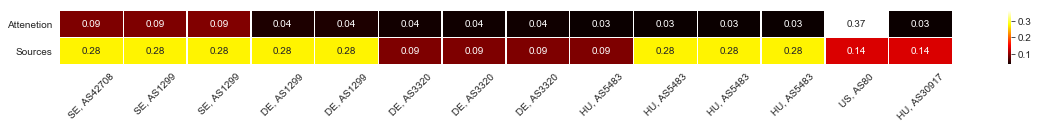

SDPA_QS_KS [0.9956708]


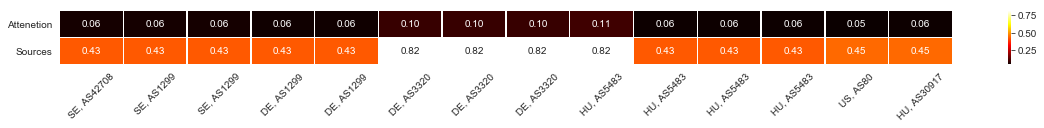

2
SDPA [0.99902415]


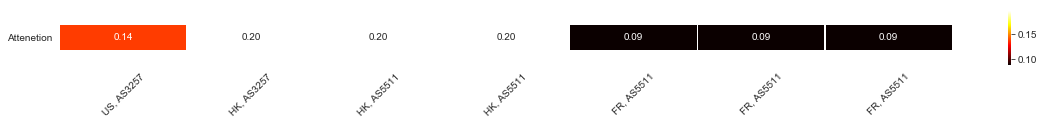

SASA [0.77941614]


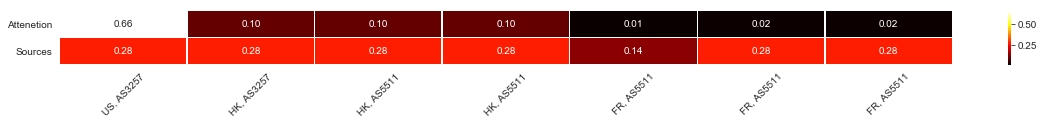

SDPA_QS_KS [0.9998288]


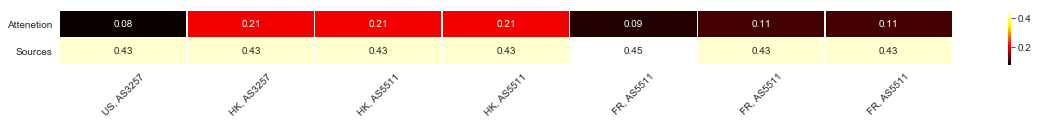

3
SDPA [0.99565744]


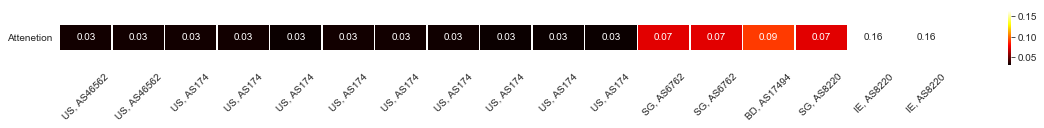

SASA [0.99995446]


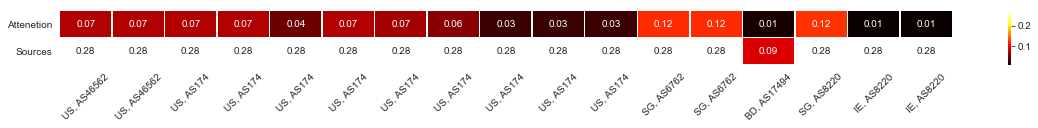

SDPA_QS_KS [0.9895393]


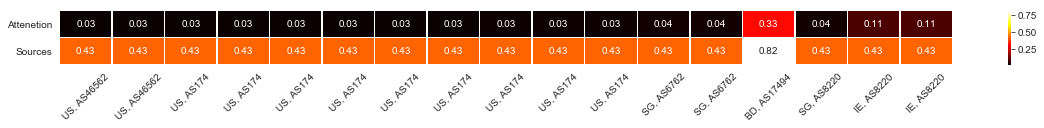

In [16]:
for i in range(len(x_use_cases)):
    print(i)
    print('SDPA', y_use_cases_prob_sdpa[i])
    generate_attention_plot(i, use_cases, attention_vec_out_sdpa[i], use_sources=False, sources_out=None,
                        attention_name='SDPA', rot=45)
    
    print('SASA', y_use_cases_prob_sasa[i])
    generate_attention_plot(i, use_cases, attention_vec_out_sasa[i], use_sources=True, sources_out=sources_out_sasa[i],
                        attention_name='SASA', rot=45)
    
    print('SDPA_QS_KS', y_use_cases_prob_sdpa_qs_ks[i])
    generate_attention_plot(i, use_cases, attention_vec_out_sdpa_qs_ks[i], use_sources=True, sources_out=sources_out_sdpa_qs_ks[i],
                        attention_name='SDPA_QS_KS', rot=45)

0
SDPA [0.9729191]


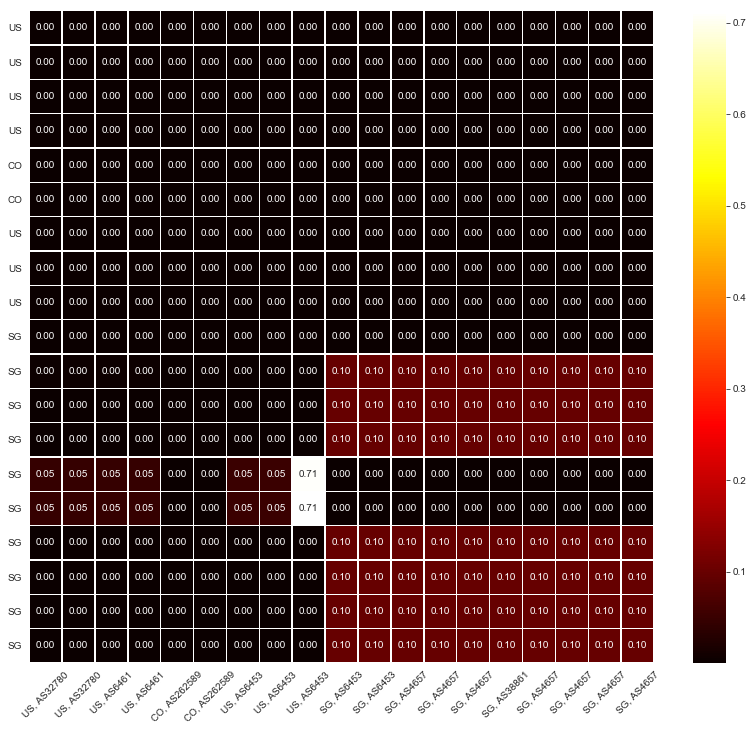

SASA [0.7499372]


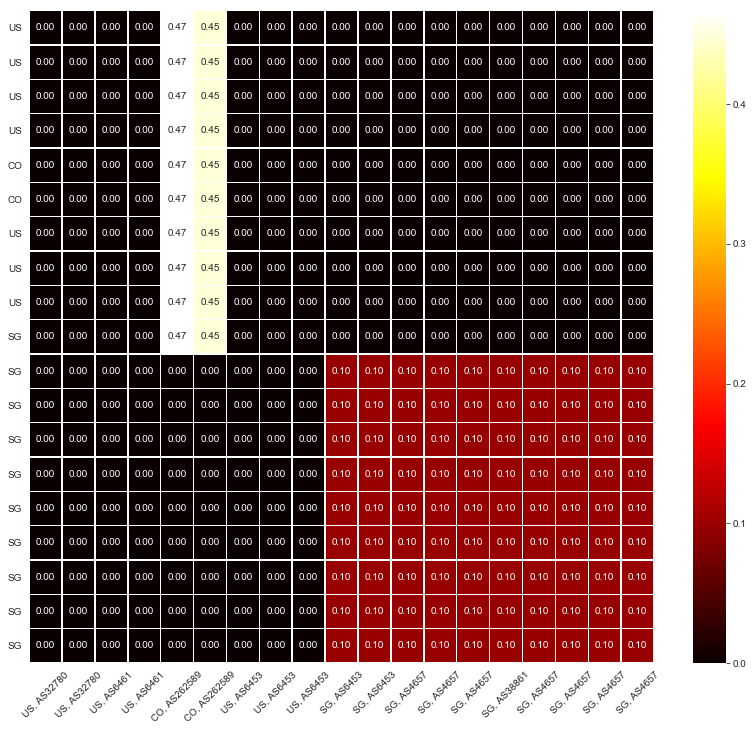

SDPA_QS_KS [0.81392133]


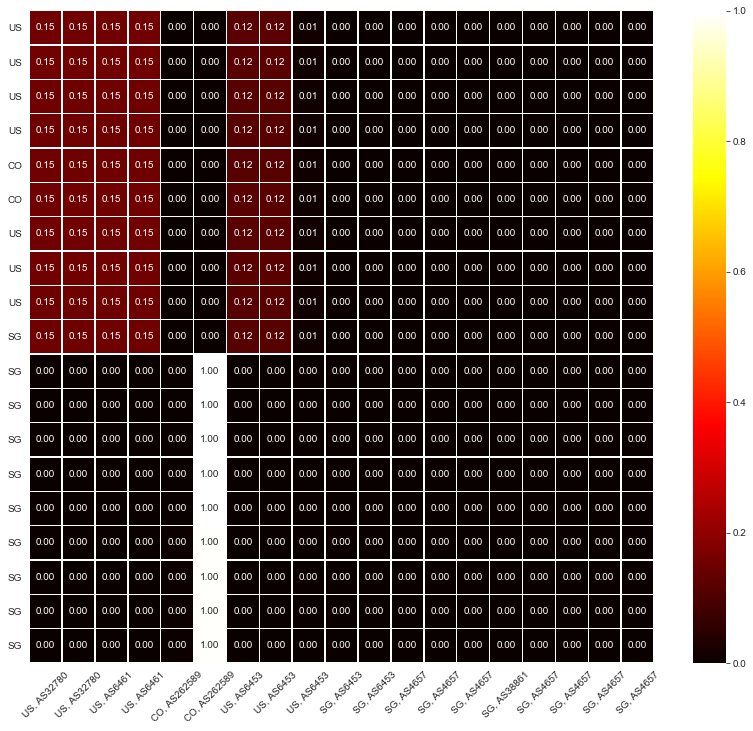

1
SDPA [0.987117]


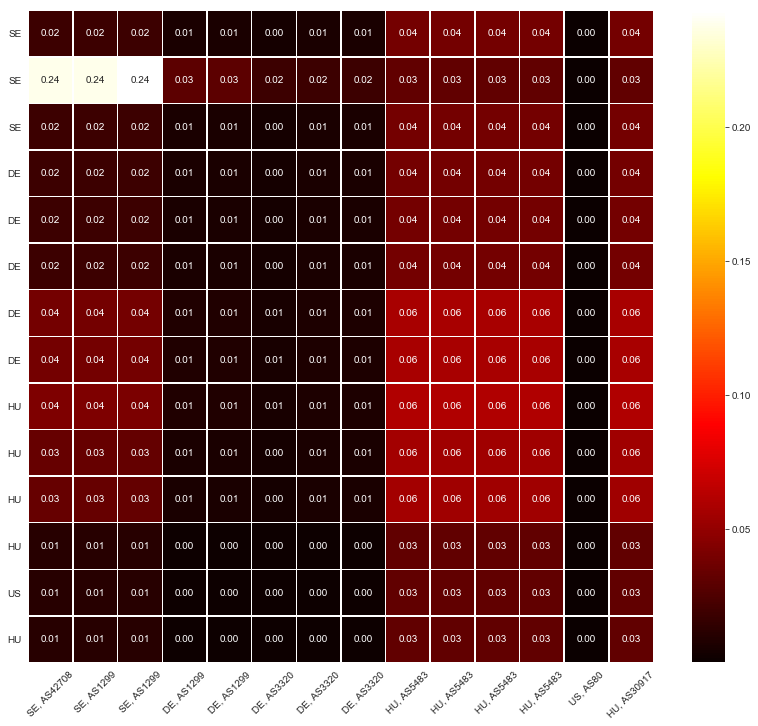

SASA [0.99965346]


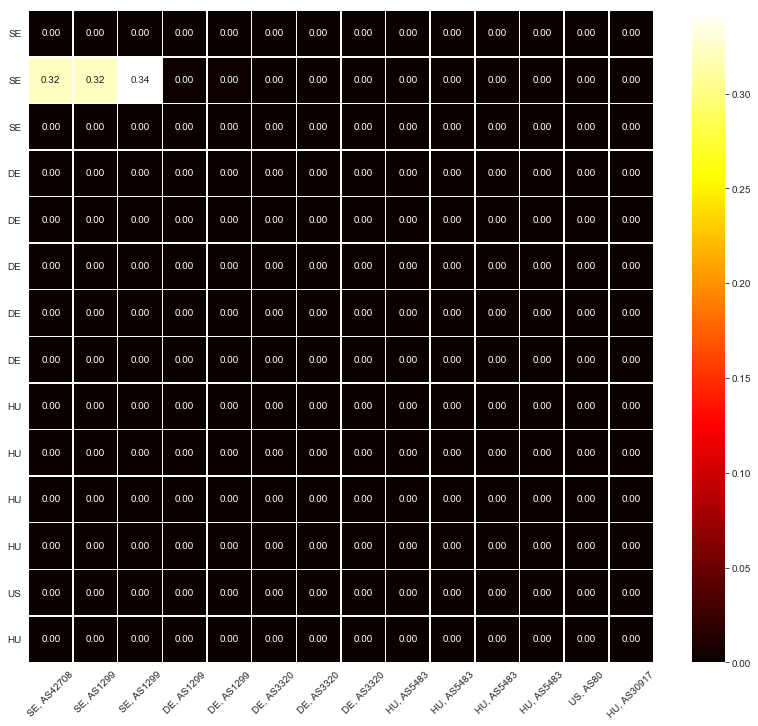

SDPA_QS_KS [0.9956708]


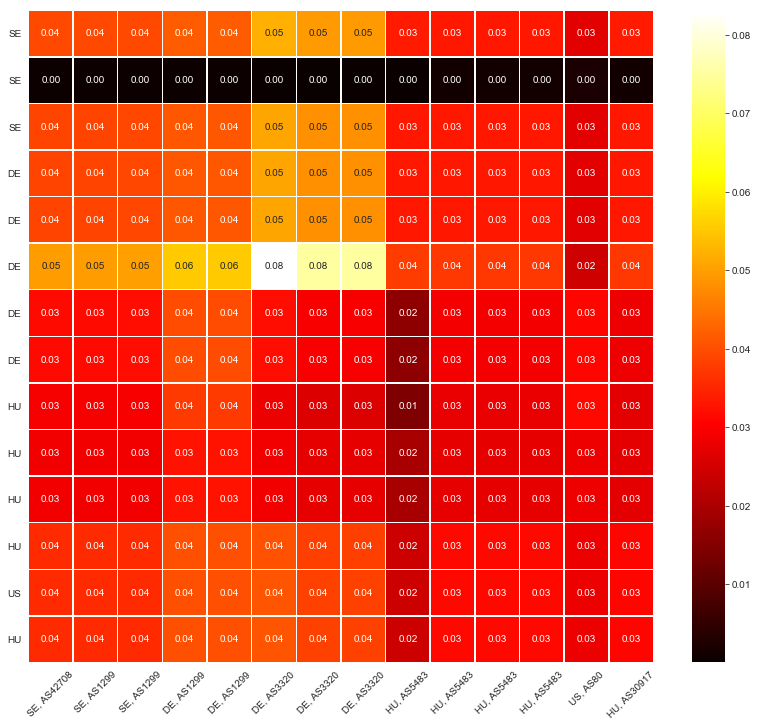

2
SDPA [0.99902415]


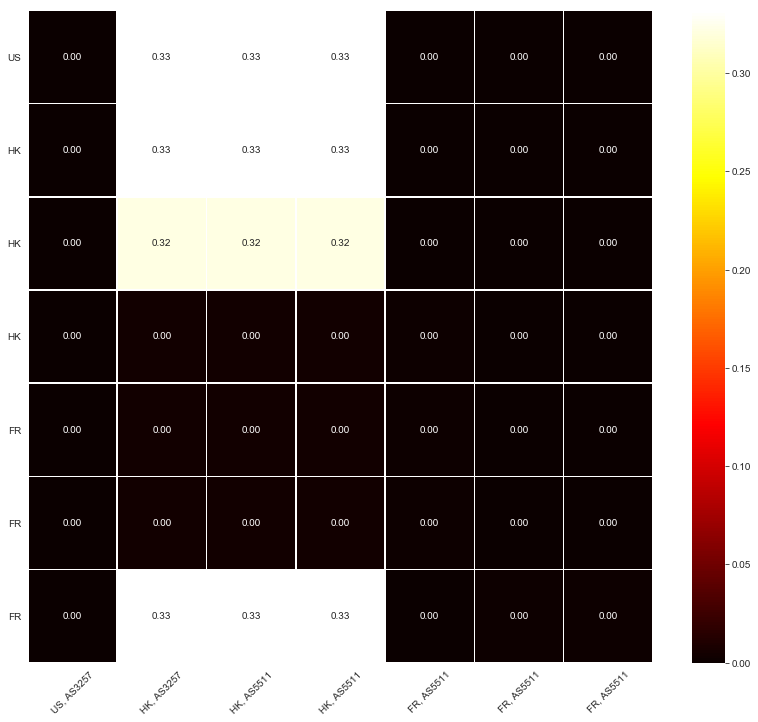

SASA [0.77941614]


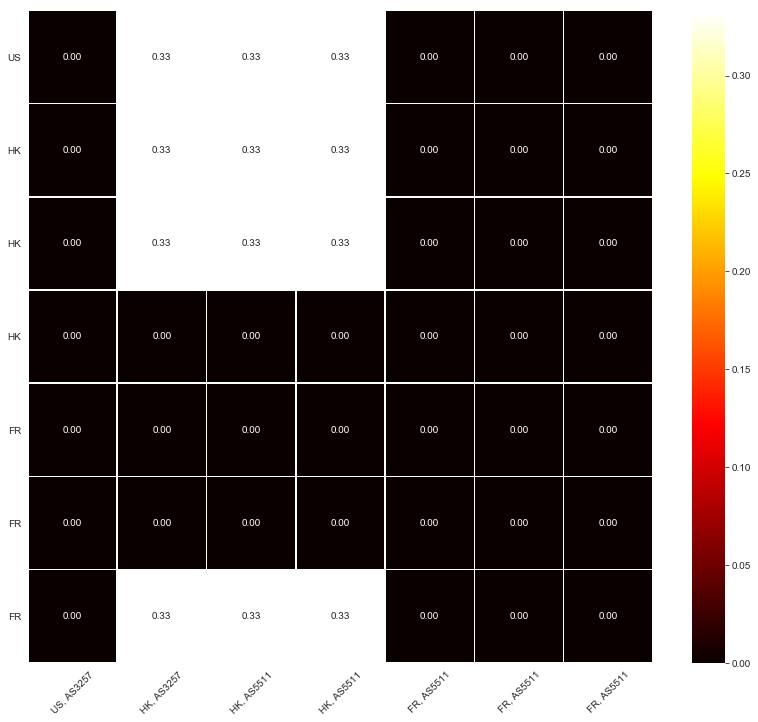

SDPA_QS_KS [0.9998288]


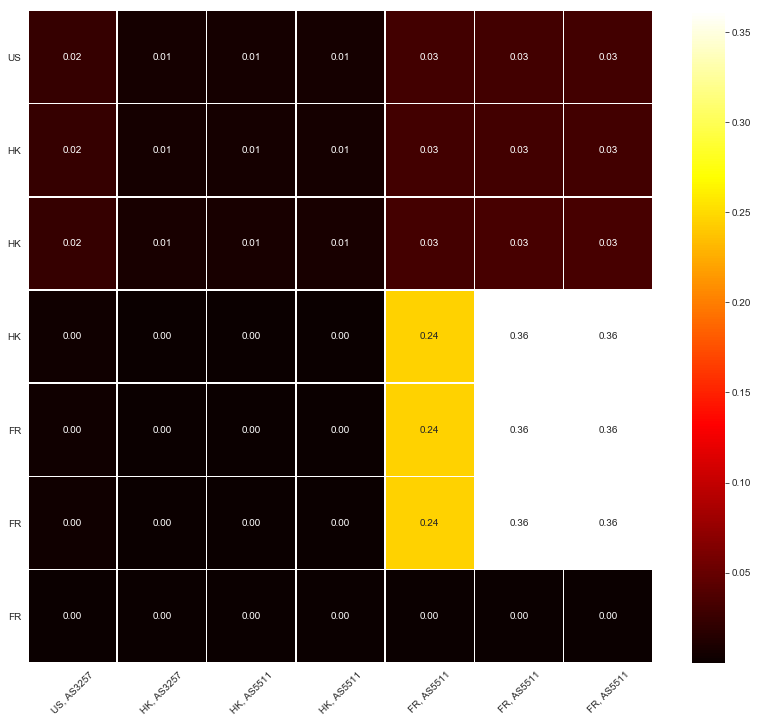

3
SDPA [0.99565744]


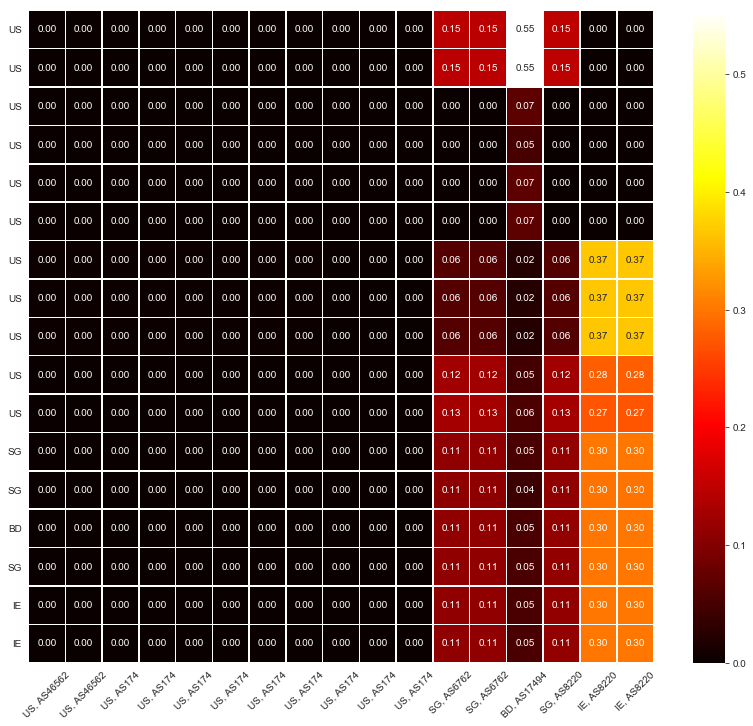

SASA [0.99995446]


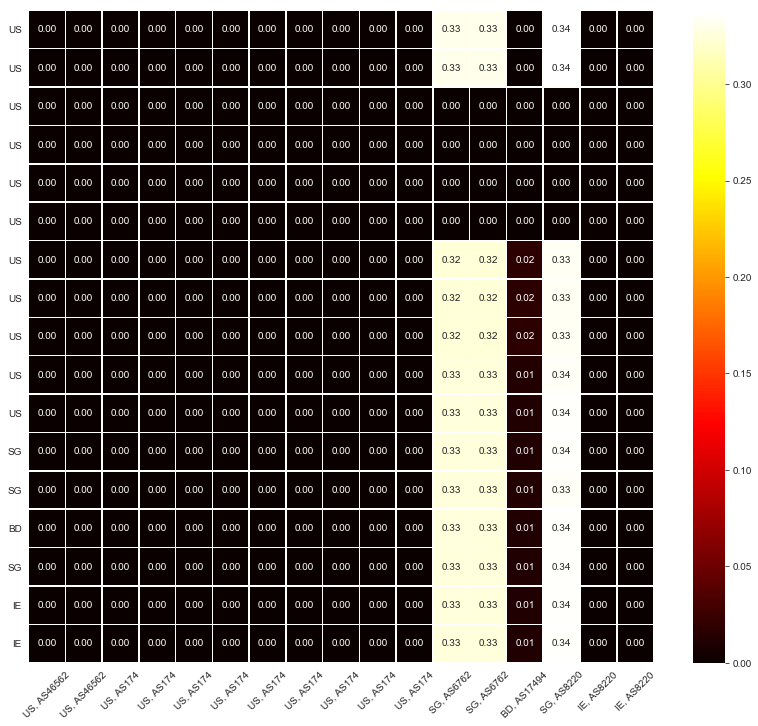

SDPA_QS_KS [0.9895393]


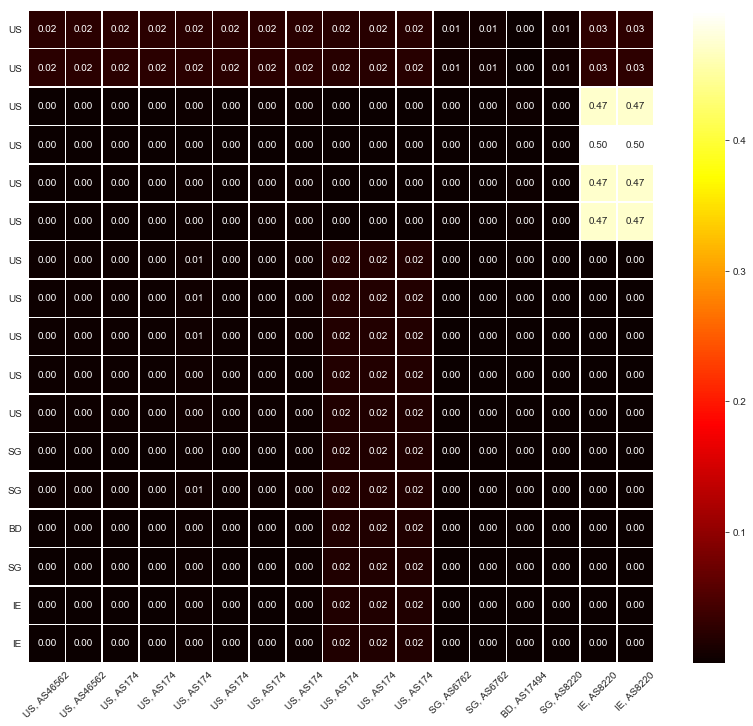

In [17]:
for i in range(len(x_use_cases)):
    print(i)
    print('SDPA', y_use_cases_prob_sdpa[i])
    generate_attention_plot(i, use_cases, attention_vec_out_sdpa[i], use_sources=False, sources_out=None,
                        attention_name='SDPA', full_attention_matrix=True, rot=45)
    
    print('SASA', y_use_cases_prob_sasa[i])
    generate_attention_plot(i, use_cases, attention_vec_out_sasa[i], use_sources=True, sources_out=sources_out_sasa[i],
                        attention_name='SASA', full_attention_matrix=True, rot=45)
    
    print('SDPA_QS_KS', y_use_cases_prob_sdpa_qs_ks[i])
    generate_attention_plot(i, use_cases, attention_vec_out_sdpa_qs_ks[i], use_sources=True, sources_out=sources_out_sdpa_qs_ks[i],
                        attention_name='SDPA_QS_KS', full_attention_matrix=True, rot=45)